# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Pavel Andrés Aguilar Luna
*   Matrícula: 255880

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [86]:
from google.colab import drive
drive.mount('/content/drive')
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd; df=pd.read_csv('/content/drive/MyDrive/Unidad04/restaurantes.csv')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
header('Parte #1')
print(f'Primeras 8 filas del dataframe\n{df.head(8)}\n\nLos datos descriptivos son:\n{df.describe()}');separador()

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte #1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


Primeras 8 filas del dataframe
   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
5     8.3829  11.8860
6     7.4764   4.3483
7     8.5781  12.0000

Los datos descriptivos son:
       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000




##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 2.1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




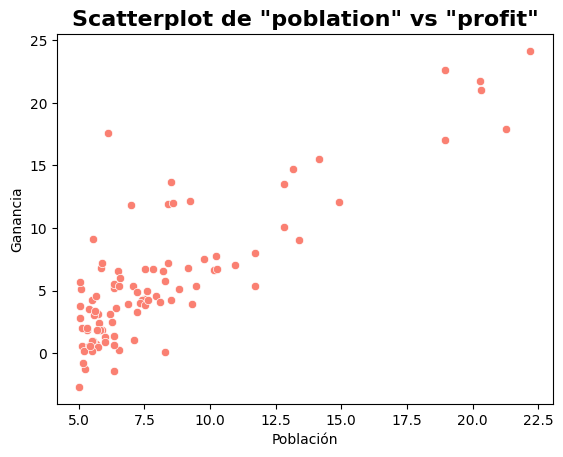



La relación entre las variables parece lineal porque en los lugares donde hay mas población debe haber mayor numero de ventas, por tanto maumentan las ganancias




In [107]:
header('Parte 2.1')
sns.scatterplot(data=df, x='poblation', y='profit', color='salmon')
plt.title('Scatterplot de "poblation" vs "profit"', size=16, fontweight='bold');plt.xlabel('Población');plt.ylabel('Ganancia');plt.show();separador()
print('La relación entre las variables parece lineal porque en los lugares donde hay mas población debe haber mayor numero de ventas, por tanto maumentan las ganancias');separador()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

In [6]:
header('Parte 2.2')
print(f'El coeficiente de correlación de Pearson entre las columnas "poblation" y "profit" es: {(df["poblation"].corr(df["profit"]))}');separador()
print('Las columnas tienen una correlación positiva fuerte (por estar entre .7 y .9), ya que al aumentar una la otra aumenta de forma casi proporcional, lo que coincide con lo mostrado en el scatterplot anterior');separador()

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 2.2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


El coeficiente de correlación de Pearson entre las columnas "poblation" y "profit" es: 0.837873232526341


Las columnas tienen una correlación positiva fuerte (por estar entre .7 y .9), ya que al aumentar una la otra aumenta de forma casi proporcional, lo que coincide con lo mostrado en el scatterplot anterior




## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [22]:
header('Parte #3.1')
X=df[['poblation']].values.reshape(-1,1);y=df['profit'].values;modelo=LinearRegression();modelo.fit(X,y)
print(f'El intercepto del modelo es: {modelo.intercept_}\nEl coeficiente de la regresión (pendiente) es: {modelo.coef_[0]}');separador()
print(f'El INTERCEPTO de {modelo.intercept_:.2f} es el punto en donde cruza la "y" cuando la población es 0, esto tiene sentido, porque sin población habría perdidas economicas hasta por gastos operativos sin ganancias.')
print(f'El COEFICIENTE DE LA REGRESIÓN significa que la relación es positiva, y representa un crecimiento ligado entre la población y la ganancia, por cada unidad de población que aumente la ganancia se incrementa {modelo.coef_[0]:.2f} unidades'); separador()

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte #3.1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


El intercepto del modelo es: -3.8957808783118484
El coeficiente de la regresión (pendiente) es: 1.1930336441895932


El INTERCEPTO de -3.90 es el punto en donde cruza la "y" cuando la población es 0, esto tiene sentido, porque sin población habría perdidas economicas hasta por gastos operativos sin ganancias.
El COEFICIENTE DE LA REGRESIÓN significa que la relación es positiva, y representa un crecimiento ligado entre la población y la ganancia, por cada unidad de población que aumente la ganancia se incrementa 1.19 unidades




### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 3.2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




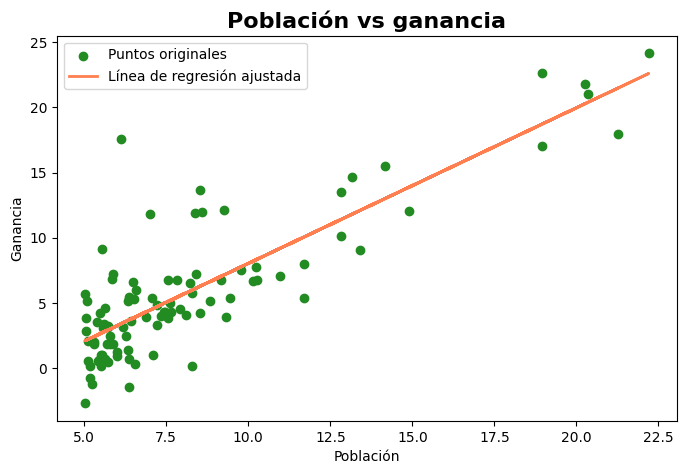

In [34]:
header('Parte 3.2')
plt.figure(figsize=(8, 5));plt.scatter(X, y, color='forestgreen', label='Puntos originales');plt.plot(X, modelo.predict(X), color='coral', linewidth=2, label='Línea de regresión ajustada')
plt.xlabel('Población');plt.ylabel('Ganancia');plt.title('Población vs ganancia', size=16, fontweight='bold');plt.legend();plt.show();separador()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




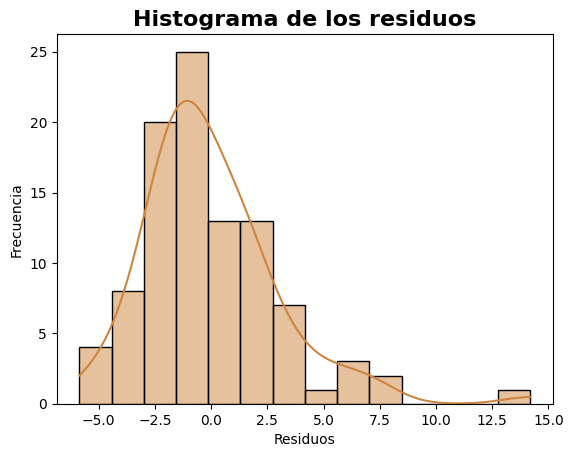



Los residuos NO siguen una distribución normal


In [47]:
header('Parte 4.1')
from scipy.stats import shapiro
residuos=y-modelo.predict(X)
#plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, color='peru', orientation='horizontal')
plt.xlabel('Residuos');plt.ylabel('Frecuencia');plt.title('Histograma de los residuos', size=16, fontweight='bold');plt.show();separador()
stat, p=shapiro(residuos)
#print(f'{stat:.3f}, {p:.3f}')
if p>0.05:
  print('Los residuos siguen una distribución normal')
else:
  print('Los residuos NO siguen una distribución normal')




### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




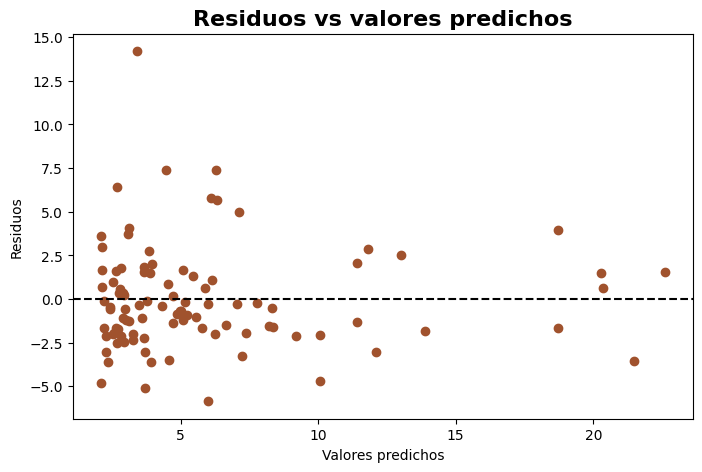



Los residuos están distribuidos aleatoriamente, no muestran un patrón




In [54]:
header('Parte 4.2')
plt.figure(figsize=(8,5));plt.scatter(modelo.predict(X), residuos, color='sienna');plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Valores predichos');plt.ylabel('Residuos');plt.title('Residuos vs valores predichos', size=16, fontweight='bold');plt.show();separador()
print('Los residuos están distribuidos aleatoriamente, no muestran un patrón');separador()


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 4.3 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 




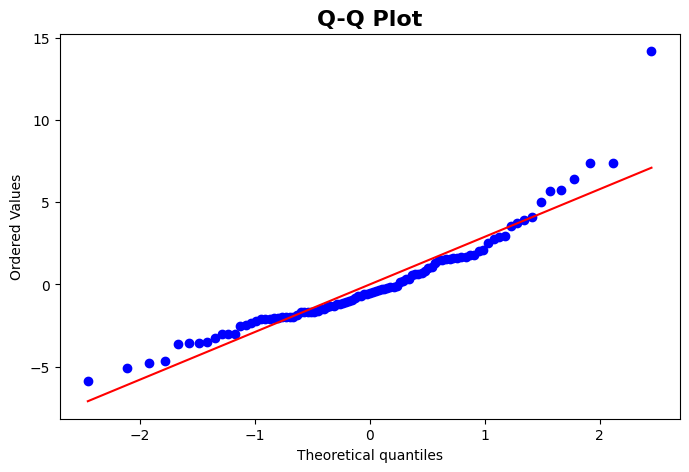



Los puntos se alinean aproximadamente sobre la línea diagonal, los residuos parecen seguir una distribución normal, pero es de importante notar algunos outliers como el ultimo




In [60]:
header('Parte 4.3')
from scipy.stats import probplot
plt.figure(figsize=(8,5));probplot(residuos, dist='norm', plot=plt);plt.title('Q-Q Plot', size=16, fontweight='bold');plt.show();separador()
print('Los puntos se alinean aproximadamente sobre la línea diagonal, los residuos parecen seguir una distribución normal, pero es de importante notar algunos outliers como el ultimo');separador()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [79]:
header('Parte 5')
mse=mean_squared_error(y, modelo.predict(X))
rmse=np.sqrt(mse)
r2=r2_score(y, modelo.predict(X))
print(f'El MSE del modelo es: {mse:.5f}\nEl RMSE del modelo es: {rmse:.5f}\nEl R² del modelo es: {r2:.5f}');separador()
#print(y.std(), y.mean())
print('▀ En el MSE un numero bajo es sinónimo de un mejor modelo, es decir, entre mas bajo el modelo es mas preciso y visceversa. Arroja un valor al cuadrado')
print('▀ El RMSE arroja el mismo valor que el MSE pero sin el cuadrado (raíz cuadrada de MSE). De igual forma se busca un número bajo. Como referencia debe ser menor que la media y que la desviación estandar para considerarse un buen modelo')
print('▀ El coeficiente de determinación (R2) mide que tan bien explica el modelo la variabilidad de los datos. Los valores deben estar entre 0 y 1, entre mayor sea mejor es el modelo')
print('\nSegún los resultados de las evaluaciones, el modelo es bueno, pero definitivamente es suceptible a mejoras.')

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Parte 5 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


El MSE del modelo es: 8.95394
El RMSE del modelo es: 2.99231
El R² del modelo es: 0.70203


▀ En el MSE un numero bajo es sinónimo de un mejor modelo, es decir, entre mas bajo el modelo es mas preciso y visceversa. Arroja un valor al cuadrado
▀ El RMSE arroja el mismo valor que el MSE pero sin el cuadrado (raíz cuadrada de MSE). De igual forma se busca un número bajo. Como referencia debe ser menor que la media y que la desviación estandar para considerarse un buen modelo
▀ El coeficiente de determinación (R2) mide que tan bien explica el modelo la variabilidad de los datos. Los valores deben estar entre 0 y 1, entre mayor sea mejor es el modelo

Según los resultados de las evaluaciones, el modelo es bueno, pero definitivamente es suceptible a mejoras.


## Parte 6: Conclusiones
Responde con tus propias palabras:

**- ¿Qué tan útil consideras el modelo?**

Según los resultados previamente arrojados, considero que el modelo es bueno, pero si es necesario mejorarlo.

**- ¿Qué limitaciones encuentras?**

Según el resultado de R2, casi un 30% de variabilidad no es explicada, es faltante. Según los residuos, el modelo es heterocedasticico, podría no ser confiable.

**- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.**

El unico ajuste en donde pude notar que mejoró el modelo es al eliminar Outliers, usando limite inferior y superior con cuantiles.

**En la evaluación al original:**

*   El MSE del modelo es: 8.95394
*   El RMSE del modelo es: 2.99231
*   El R² del modelo es: 0.70203



**En la evaluación sin outliers:**

* MSE: 6.97424
* RMSE: 2.64088
* R2: 0.39369

Al eliminar los outliers se representa menor variabilidad por eso disminuye R2, pero RMSE Y MSE mejoran pocos decimales. Probablemente sea mejor idea tomar otra opción conservando todos los datos originales, por que se pierde mucho y se gana poco.

...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ajuste 1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


  Transformación       MSE      RMSE        R2
0       Original  6.974236  2.640878  0.393692
1      Logaritmo  6.878079  2.622609  0.402051
2       Cuadrado  7.234215  2.689650  0.371090
3  Raíz Cuadrada  6.903823  2.627513  0.399813


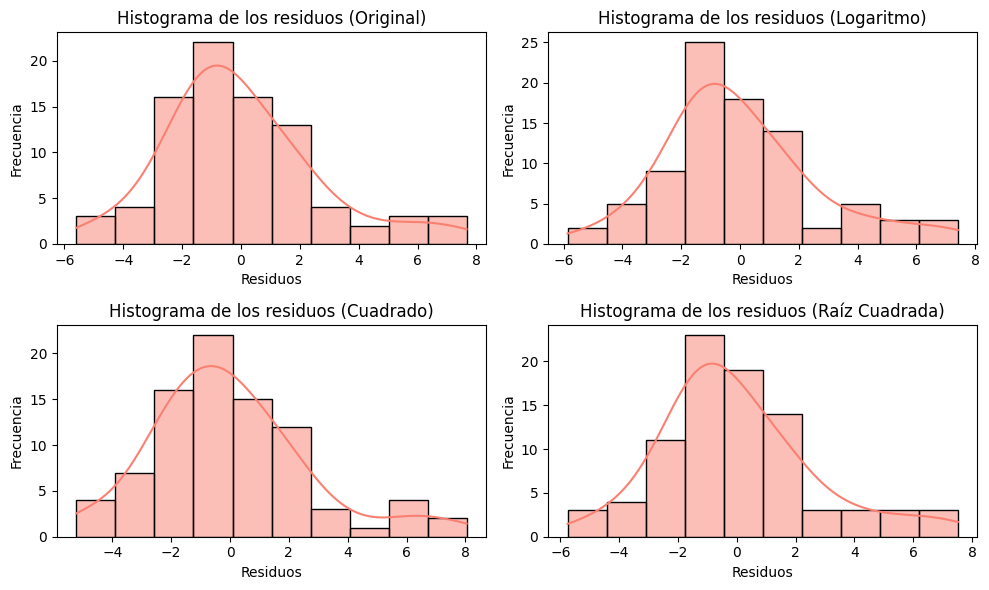

In [105]:
header('Ajuste 1')
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
resultados=[]
X_log=np.log(X+1)
X_quad=X**2
X_sqrt=np.sqrt(X)
transformaciones={'Original': X, 'Logaritmo': X_log, 'Cuadrado': X_quad, 'Raíz Cuadrada': X_sqrt}
for nombre, X_transformado in transformaciones.items():
  modelo.fit(X_transformado, y)
  y_pred=modelo.predict(X_transformado)
  mse=mean_squared_error(y, y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y, y_pred)
  resultados.append([nombre, mse, rmse, r2])

df_resultados=pd.DataFrame(resultados, columns=['Transformación', 'MSE', 'RMSE', 'R2'])
print(df_resultados)
#graficas
plt.figure(figsize=(10,6))
for i, (nombre, X_transformado) in enumerate(transformaciones.items()):
  modelo.fit(X_transformado, y)
  residuos=y-modelo.predict(X_transformado)

  plt.subplot(2, 2, i+1)
  sns.histplot(residuos, kde=True, color='salmon')
  plt.title(f'Histograma de los residuos ({nombre})')
  plt.xlabel('Residuos')
  plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [106]:
header('Ajuste 2')
def eliminar_otliers(df, columnas):
  df_filtrado=df.copy()
  for columna in columnas:
    Q1=df[columna].quantile(0.25)
    Q3=df[columna].quantile(0.75)
    IQR=Q3-Q1
    limite_inferior=Q1-1.5*IQR
    limite_superior=Q3+1.5*IQR
    df_filtrado=df_filtrado[(df_filtrado[columna]>=limite_inferior)&(df_filtrado[columna]<=limite_superior)]
  return df_filtrado

columnas_outliers=['poblation', 'profit']
df_sin_outliers=eliminar_otliers(df, columnas_outliers)
X=df_sin_outliers[['poblation']].values.reshape(-1,1)
y=df_sin_outliers['profit'].values

modelo=LinearRegression()
modelo.fit(X,y)
y_pred=modelo.predict(X)

mse=mean_squared_error(y, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y, y_pred)

print(f'MSE: {mse:.5f}\nRMSE: {rmse:.5f}\nR2: {r2:.5f}')


...................···················~~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ajuste 2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~~···················................... 


MSE: 6.97424
RMSE: 2.64088
R2: 0.39369
